# Semestral project 1

In [2]:
# .libPaths("~/tmp/bi-prs/")
# install.packages('dplyr')
library(eurostat)
library(ggplot2)
library(corrplot)
library(vtable)
library(cowplot)
library(moments)
library(e1071)
library(dplyr)
library(tidyr)



options(repr.matrix.max.rows = Inf, repr.matrix.max.cols = Inf)
options(width=160, repr.plot.width=11, repr.plot.height=8)     

In [3]:
srch <- search_eurostat(pattern='Police-recorded offences by NUTS 3 regions')
srch

title                                      code         type    last.update.of.data last.table.structure.change data.start data.end values hierarchy
1 Police-recorded offences by NUTS 3 regions crim_gen_reg dataset 05.12.2023          05.12.2023                  2008       2021     216947 4        
2 Police-recorded offences by NUTS 3 regions crim_gen_reg dataset 05.12.2023          05.12.2023                  2008       2021     216947 4

Based on the equation, we load all the **Portugal's** NUTS3 regions

In [4]:
id <- 'crim_gen_reg'
dat <- get_eurostat(id=id)
NUTS3 <- c("PT111", "PT112", "PT119", "PT11A", "PT11B", "PT11C", "PT11D", "PT11E", 
                   "PT150", "PT16B", "PT16D", "PT16E", "PT16F", "PT16G", "PT16H", "PT16I", 
                   "PT16J", "PT170", "PT181", "PT184", "PT185", "PT186", "PT187", "PT200", 
                   "PT300")
#excluded "PTZZZ" outlier
data <- dat[dat$geo %in% NUTS3,]
head(data)

Table crim_gen_reg cached at /tmp/RtmpeE9CMD/eurostat/98af49bd352106a654325666eac609d0.rds



freq unit iccs     geo   TIME_PERIOD values
1 A    NR   ICCS0101 PT111 2008-01-01  1     
2 A    NR   ICCS0101 PT111 2009-01-01  0     
3 A    NR   ICCS0101 PT111 2010-01-01  4     
4 A    NR   ICCS0101 PT111 2011-01-01  1     
5 A    NR   ICCS0101 PT111 2012-01-01  2     
6 A    NR   ICCS0101 PT111 2013-01-01  1

Label unique values, so we know what the abbreviation means

In [5]:
label_data <- label_eurostat(data)
head(label_data)
unique_iccs_values <- unique(label_data$iccs)
print(unique_iccs_values)
unique_freq_values <- unique(label_data$freq)
print(unique_freq_values)
unique_unit_values <- unique(label_data$unit)
print(unique_unit_values)

freq   unit   iccs                 geo        TIME_PERIOD values
1 Annual Number Intentional homicide Alto Minho 2008-01-01  1     
2 Annual Number Intentional homicide Alto Minho 2009-01-01  0     
3 Annual Number Intentional homicide Alto Minho 2010-01-01  4     
4 Annual Number Intentional homicide Alto Minho 2011-01-01  1     
5 Annual Number Intentional homicide Alto Minho 2012-01-01  2     
6 Annual Number Intentional homicide Alto Minho 2013-01-01  1

[1] "Intentional homicide"                     "Assault"                                  "Robbery"                                 
[4] "Burglary"                                 "Burglary of private residential premises" "Theft"                                   
[7] "Theft of a motorized land vehicle"       
[1] "Annual"
[1] "Number"                           "Per hundred thousand inhabitants"


* iccs have 7 diffrent types of crimes.
* Units of measure by `number` or `Per hunred thousand inhabitants`

Filter out all crimes in TIME_PERIOD: **2021**

In [6]:
data_2021 <- subset(data, format(TIME_PERIOD, "%Y") == "2021")
head(data_2021)
unique_TIME_PERIOD_values <- unique(data_2021$TIME_PERIOD)
print(unique_TIME_PERIOD_values)

freq unit iccs     geo   TIME_PERIOD values
1 A    NR   ICCS0101 PT111 2021-01-01   0    
2 A    NR   ICCS0101 PT112 2021-01-01   1    
3 A    NR   ICCS0101 PT119 2021-01-01   2    
4 A    NR   ICCS0101 PT11A 2021-01-01  10    
5 A    NR   ICCS0101 PT11B 2021-01-01   1    
6 A    NR   ICCS0101 PT11C 2021-01-01   3

[1] "2021-01-01"


We create two dataframes, each with it's own correct unit of measure

In [7]:
data_2021_NR <- subset(data_2021, unit == "NR")
data_2021_P_HTHAB <- subset(data_2021, unit == "P_HTHAB")
head(data_2021_NR)
head(data_2021_P_HTHAB)

freq unit iccs     geo   TIME_PERIOD values
1 A    NR   ICCS0101 PT111 2021-01-01   0    
2 A    NR   ICCS0101 PT112 2021-01-01   1    
3 A    NR   ICCS0101 PT119 2021-01-01   2    
4 A    NR   ICCS0101 PT11A 2021-01-01  10    
5 A    NR   ICCS0101 PT11B 2021-01-01   1    
6 A    NR   ICCS0101 PT11C 2021-01-01   3

freq unit    iccs     geo   TIME_PERIOD values
1 A    P_HTHAB ICCS0101 PT111 2021-01-01  0.00  
2 A    P_HTHAB ICCS0101 PT112 2021-01-01  0.25  
3 A    P_HTHAB ICCS0101 PT119 2021-01-01  0.49  
4 A    P_HTHAB ICCS0101 PT11A 2021-01-01  0.58  
5 A    P_HTHAB ICCS0101 PT11B 2021-01-01  1.17  
6 A    P_HTHAB ICCS0101 PT11C 2021-01-01  0.73

In final dataset with columns `iccs`, `geo`, `values`

In [8]:
data_2021_NR$freq <- NULL
data_2021_NR$unit <- NULL
data_2021_NR$TIME_PERIOD <- NULL
data_2021_P_HTHAB$freq <- NULL
data_2021_P_HTHAB$unit <- NULL
data_2021_P_HTHAB$TIME_PERIOD <- NULL

head(data_2021_NR)
head(data_2021_P_HTHAB)

iccs     geo   values
1 ICCS0101 PT111  0    
2 ICCS0101 PT112  1    
3 ICCS0101 PT119  2    
4 ICCS0101 PT11A 10    
5 ICCS0101 PT11B  1    
6 ICCS0101 PT11C  3

iccs     geo   values
1 ICCS0101 PT111 0.00  
2 ICCS0101 PT112 0.25  
3 ICCS0101 PT119 0.49  
4 ICCS0101 PT11A 0.58  
5 ICCS0101 PT11B 1.17  
6 ICCS0101 PT11C 0.73

## Task 01

Create datasets based on crime types

In [9]:
data_homicide_NR <- subset(data_2021_NR, iccs == "ICCS0101")
data_assault_NR <- subset(data_2021_NR, iccs == "ICCS02011")
data_robbery_NR <- subset(data_2021_NR, iccs == "ICCS0401")
data_burglary_NR <- subset(data_2021_NR, iccs == "ICCS0501")
data_burglary_residential_NR <- subset(data_2021_NR, iccs == "ICCS05012")
data_theft_NR <- subset(data_2021_NR, iccs == "ICCS0502")
data_vehicle_theft_NR <- subset(data_2021_NR, iccs == "ICCS050211")

data_homicide_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS0101")
data_assault_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS02011")
data_robbery_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS0401")
data_burglary_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS0501")
data_burglary_residential_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS05012")
data_theft_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS0502")
data_vehicle_theft_P_HTHAB <- subset(data_2021_P_HTHAB, iccs == "ICCS050211")

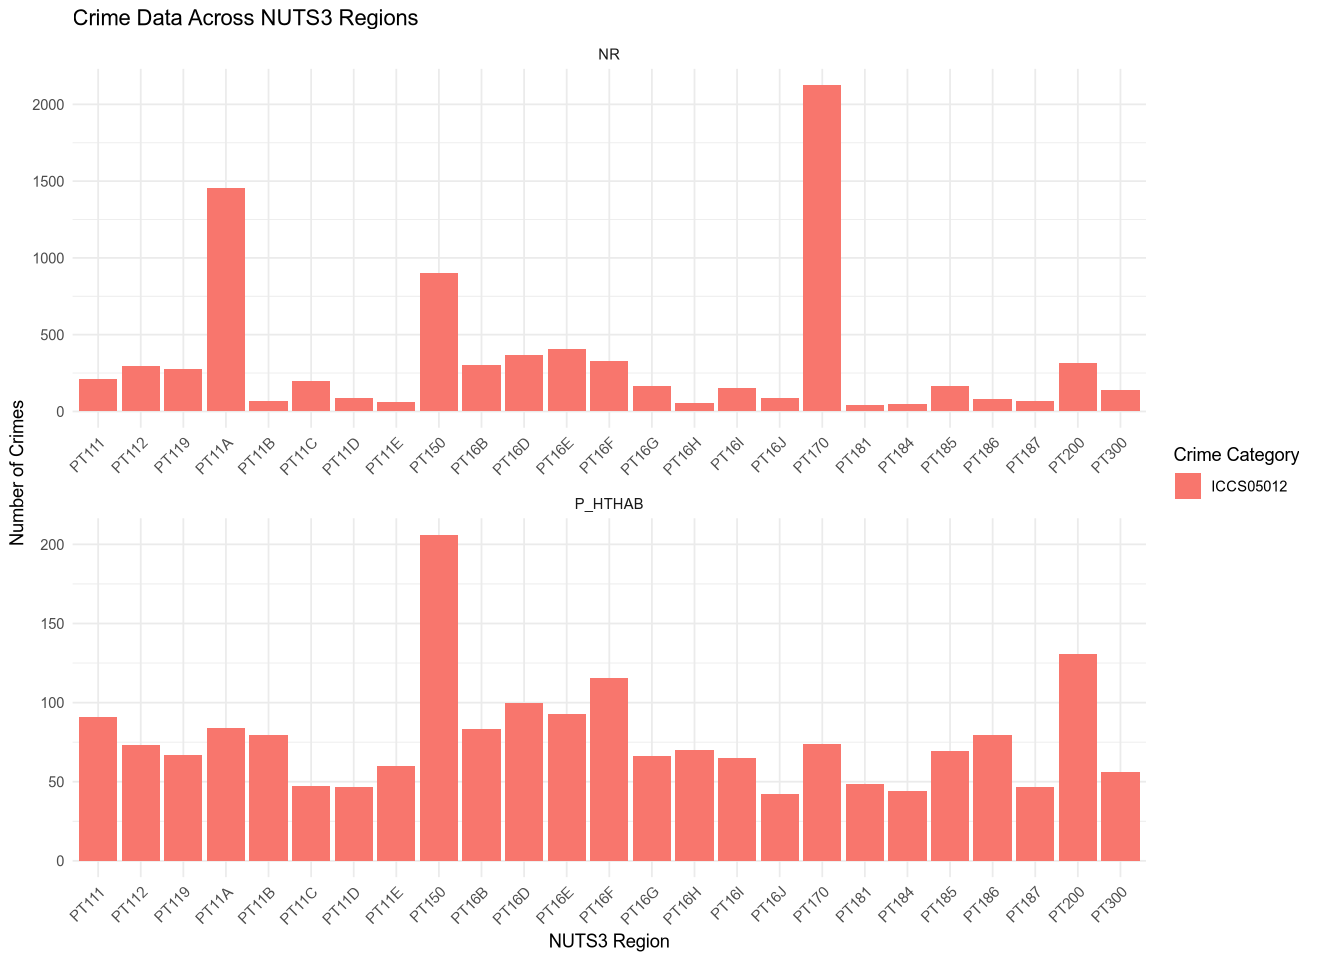

In [10]:
data_burglary_residential_NR$type <- "NR"
data_burglary_residential_P_HTHAB$type <- "P_HTHAB"
combined_data <- rbind(data_burglary_residential_NR, data_burglary_residential_P_HTHAB)

ggplot(combined_data, aes(x = geo, y = values, fill = iccs)) +
geom_bar(stat = "identity", position = "dodge") +
labs(x = "NUTS3 Region", y = "Number of Crimes", fill = "Crime Category") +
  ggtitle("Crime Data Across NUTS3 Regions") +
facet_wrap(~ type, scales = "free", ncol = 1) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))
data_burglary_residential_NR$type <- NULL
data_burglary_residential_P_HTHAB$type <- NULL

Bar graph of residential burglary accros NUTS3 regions

Intentional homicide = ICCS0101. Assault = ICCS02011. Robbery = ICCS0401. Burglary = ICCS0501. Burglary of private residential premises = ICCS05012. Theft = ICCS0502. Theft of a motorized land vehicle = ICCS050211

Rename crime codes to texts

In [11]:
# Renaming ICCS codes
iccs_mapping <- c("ICCS0101" = "Homicide",
                  "ICCS02011" = "Assault",
                  "ICCS0401" = "Robbery",
                  "ICCS0501" = "Burglary",
                  "ICCS05012" = "Residential Burglary",
                  "ICCS0502" = "Theft",
                  "ICCS050211" = "Vehicle Theft")

data_2021_NR <- data_2021_NR %>%
  mutate(iccs = case_when(iccs %in% names(iccs_mapping) ~ iccs_mapping[iccs],
                          TRUE ~ iccs))

data_2021_P_HTHAB <- data_2021_P_HTHAB %>%
  mutate(iccs = case_when(iccs %in% names(iccs_mapping) ~ iccs_mapping[iccs],
                          TRUE ~ iccs))

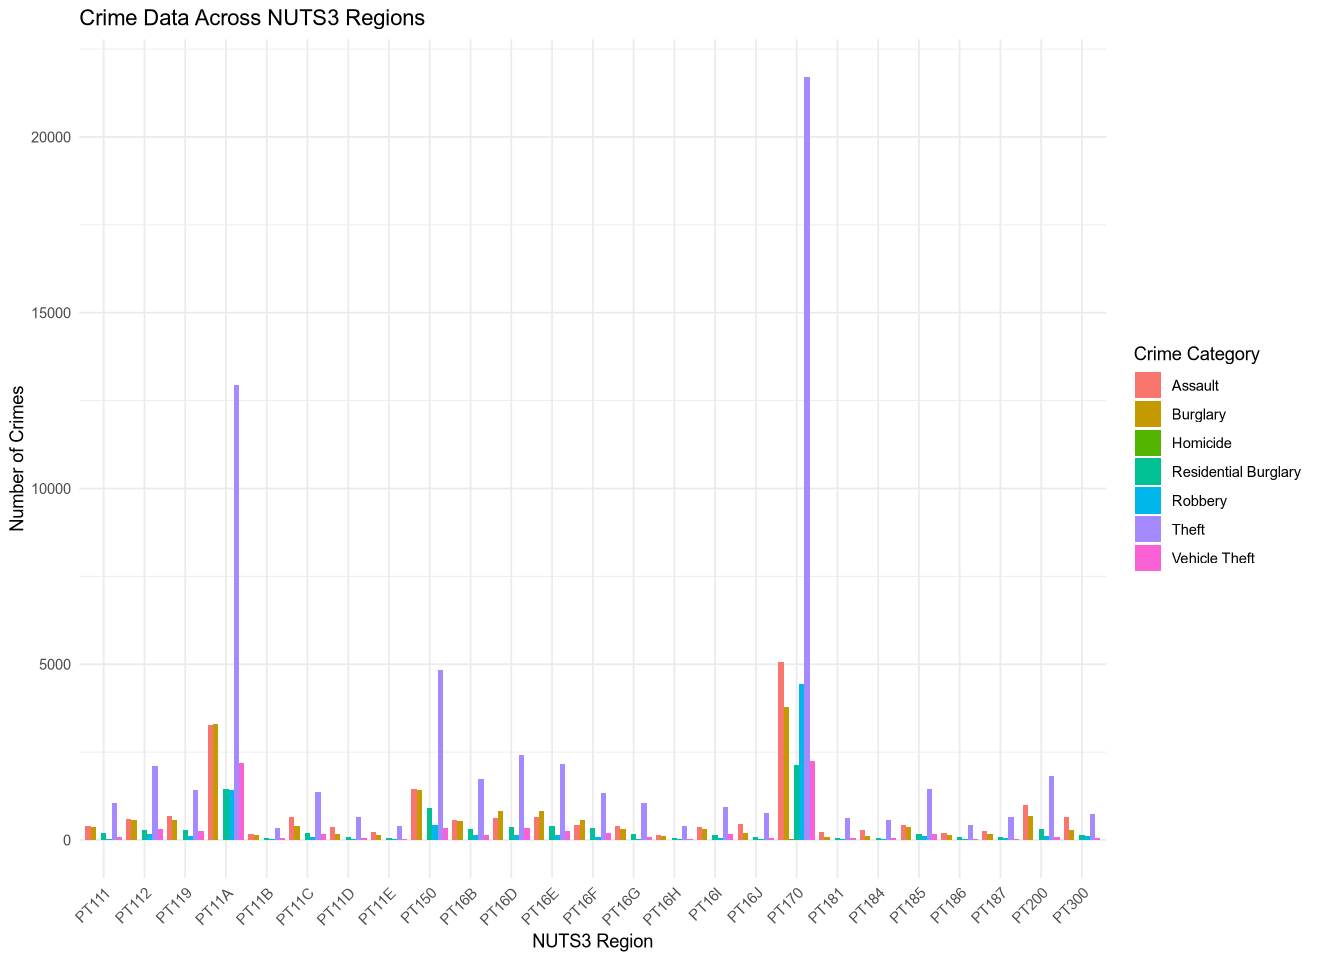

In [12]:
ggplot(data_2021_NR, aes(x = geo, y = values, fill = iccs)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "NUTS3 Region", y = "Number of Crimes", fill = "Crime Category") +
  ggtitle("Crime Data Across NUTS3 Regions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Major cities (PT170 = Lisbon, PT11A = Porto) have high crime rates thanks to their high population.

PT150 = Algarve) has a high theft rate but is not densely populated.

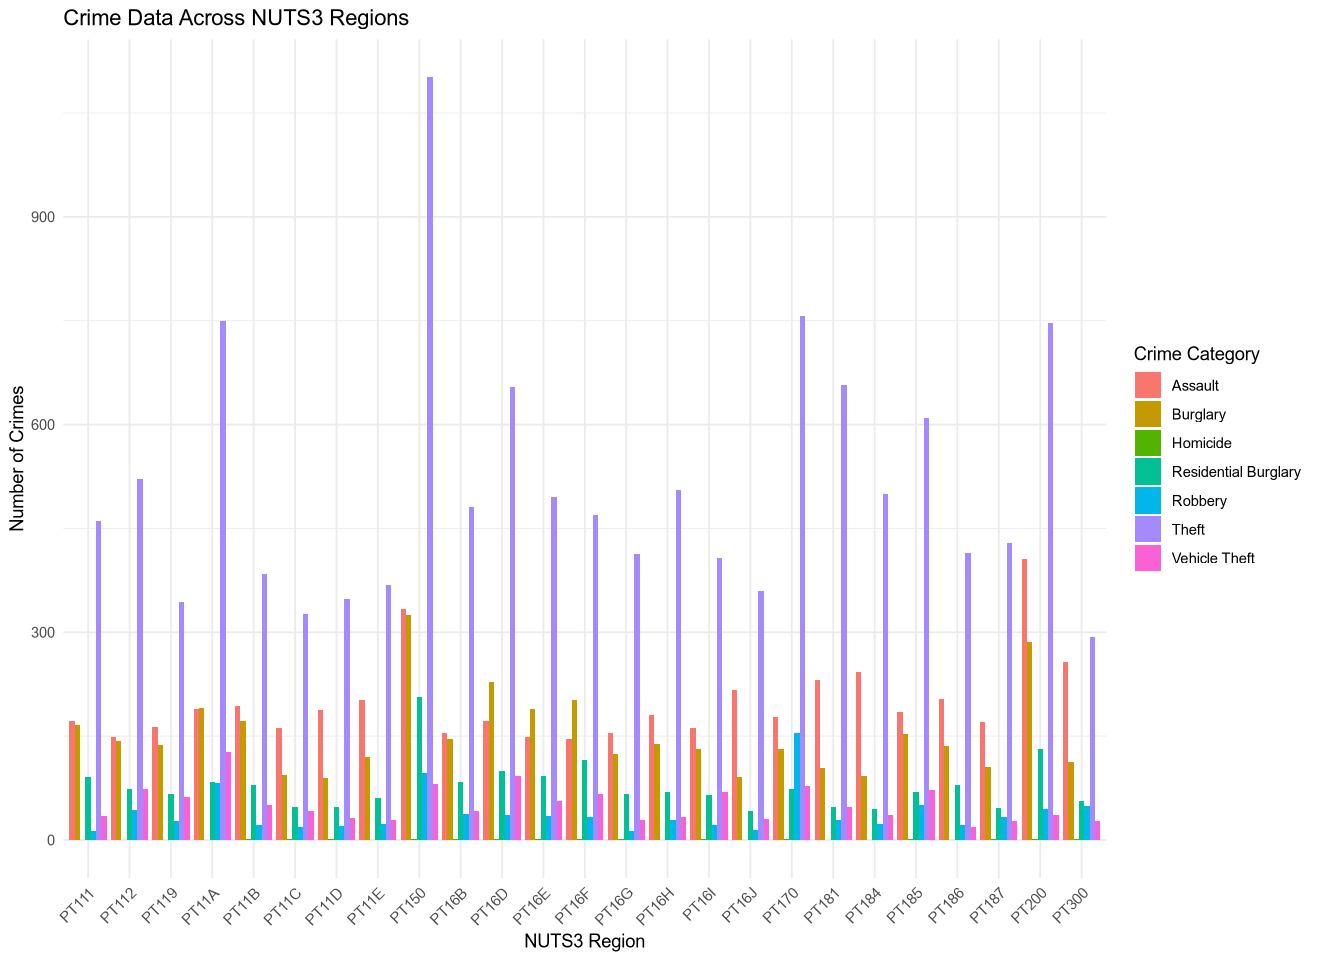

In [13]:
ggplot(data_2021_P_HTHAB, aes(x = geo, y = values, fill = iccs)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "NUTS3 Region", y = "Number of Crimes", fill = "Crime Category") +
  ggtitle("Crime Data Across NUTS3 Regions") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In the data given, in perspective to population, we can see that my suspicion that PT150 has higher crime, even though it is not as densely populated. We can also see that international homicides are very low, as expected, and theft is the most common crime in all NUTS3 regions. One thing out of the ordinary would be the number of assaults in PT150 and (PT200 = Azores, PT300 = Madeira), which are small islands with extremely low population. Maybe this could be due to the numbers of tourists?

Descriptive statistics to all crimes, by number and HTHAB

In [14]:
summ <- c('notNA(x)', 'mean(x)', 'sd(x)', 'min(x)', 'pctile(x)[25]', 
          'median(x)', 'pctile(x)[75]', 'max(x)', 'IQR(x)',
          'skewness(x)', 'kurtosis(x)-3')

sumtable(data_2021_NR, out="return", summ=summ, group="iccs", group.long=T)

Variable                   NotNA Mean Sd   Min Pctile[25] Median Pctile[75] Max   IQR  Skewness Kurtosis-3
1  iccs: Assault                                                                                             
2  values                     25    782  1092 144 280        437    653        5076  373  2.9      4.7       
3                                                                                                            
4  iccs: Burglary                                                                                            
5  values                     25    656  924  97  158        364    580        3787  422  2.4      2         
6                                                                                                            
7  iccs: Homicide                                                                                            
8  values                     25    3.2  5    0   0          3      4          25    4    3.2      8         
9                                                                                                            
10 iccs: Residential Burglary                                                                                
11 values                     25    337  483  45  82         168    317        2125  235  2.5      2.8       
12                                                                                                           
13 iccs: Robbery                                                                                             
14 values                     25    316  902  18  29         75     132        4432  103  3.9      11        
15                                                                                                           
16 iccs: Theft                                                                                               
17 values                     25    2554 4717 329 648        1055   1808       21695 1160 3.1      5.8       
18                                                                                                           
19 iccs: Vehicle Theft                                                                                       
20 values                     25    299  589  20  44         87     248        2249  204  2.8      3.2

In [15]:
sumtable(data_2021_P_HTHAB, out="return", summ=summ, group="iccs", group.long=T)

Variable                   NotNA Mean Sd   Min Pctile[25] Median Pctile[75] Max  IQR Skewness Kurtosis-3
1  iccs: Assault                                                                                           
2  values                     25    198  60   146 162        180    204        406  42  2        0.84      
3                                                                                                          
4  iccs: Burglary                                                                                          
5  values                     25    152  59   90  113        137    172        326  59  1.4      -1.6      
6                                                                                                          
7  iccs: Homicide                                                                                          
8  values                     25    0.75 0.61 0   0          0.83   1.1        2    1.1 0.22     -4.1      
9                                                                                                          
10 iccs: Residential Burglary                                                                              
11 values                     25    78   35   42  56         70     84         206  28  2        1.9       
12                                                                                                         
13 iccs: Robbery                                                                                           
14 values                     25    39   31   13  21         29     44         154  22  2.3      2.2       
15                                                                                                         
16 iccs: Theft                                                                                             
17 values                     25    512  184  293 385        470    609        1101 224 1.4      -1.2      
18                                                                                                         
19 iccs: Vehicle Theft                                                                                     
20 values                     25    52   26   19  32         42     69         128  37  1        -2.4

Table of descriptive statistics with respect to all NUTS3 regions

In [16]:
sumtable(data_2021_P_HTHAB, out="return", summ=summ, group="geo", group.long=T)

Variable   NotNA Mean Sd  Min  Pctile[25] Median Pctile[75] Max  IQR Skewness Kurtosis-3
1  geo: PT111                                                                              
2  values     7     134  160 0    24         91     170        461  146 1        -3.4      
3                                                                                          
4  geo: PT112                                                                              
5  values     7     143  174 0.25 58         74     146        521  87  1.3      -2.8      
6                                                                                          
7  geo: PT119                                                                              
8  values     7     114  116 0.49 45         67     150        343  105 0.89     -3.6      
9                                                                                          
10 geo: PT11A                                                                              
11 values     7     204  250 0.58 83         128    190        750  107 1.4      -2.7      
12                                                                                         
13 geo: PT11B                                                                              
14 values     7     129  134 1.2  36         80     183        385  147 0.78     -3.9      
15                                                                                         
16 geo: PT11C                                                                              
17 values     7     99   114 0.73 30         47     128        327  98  1        -3.6      
18                                                                                         
19 geo: PT11D                                                                              
20 values     7     103  124 1.1  26         47     139        348  113 0.96     -3.7      
21                                                                                         
22 geo: PT11E                                                                              
23 values     7     114  132 0    25         60     161        368  136 0.87     -3.9      
24                                                                                         
25 geo: PT150                                                                              
26 values     7     306  372 0.68 89         206    330        1101 241 1.3      -2.9      
27                                                                                         
28 geo: PT16B                                                                              
29 values     7     135  163 0.83 40         84     150        481  110 1.2      -3        
30                                                                                         
31 geo: PT16D                                                                              
32 values     7     183  221 1.1  64         100    200        655  136 1.2      -3        
33                                                                                         
34 geo: PT16E                                                                              
35 values     7     146  168 0.92 46         93     169        496  123 1.1      -3.1      
36                                                                                         
37 geo: PT16F                                                                              
38 values     7     148  157 1.1  50         115    174        470  124 1        -3.3      
39                                                                                         
40 geo: PT16G                                                                              
41 values     7     115  143 1.6  21         66     140        412  118 1.1      -3.2      
42                                                                                         
43 geo: PT16H                                  

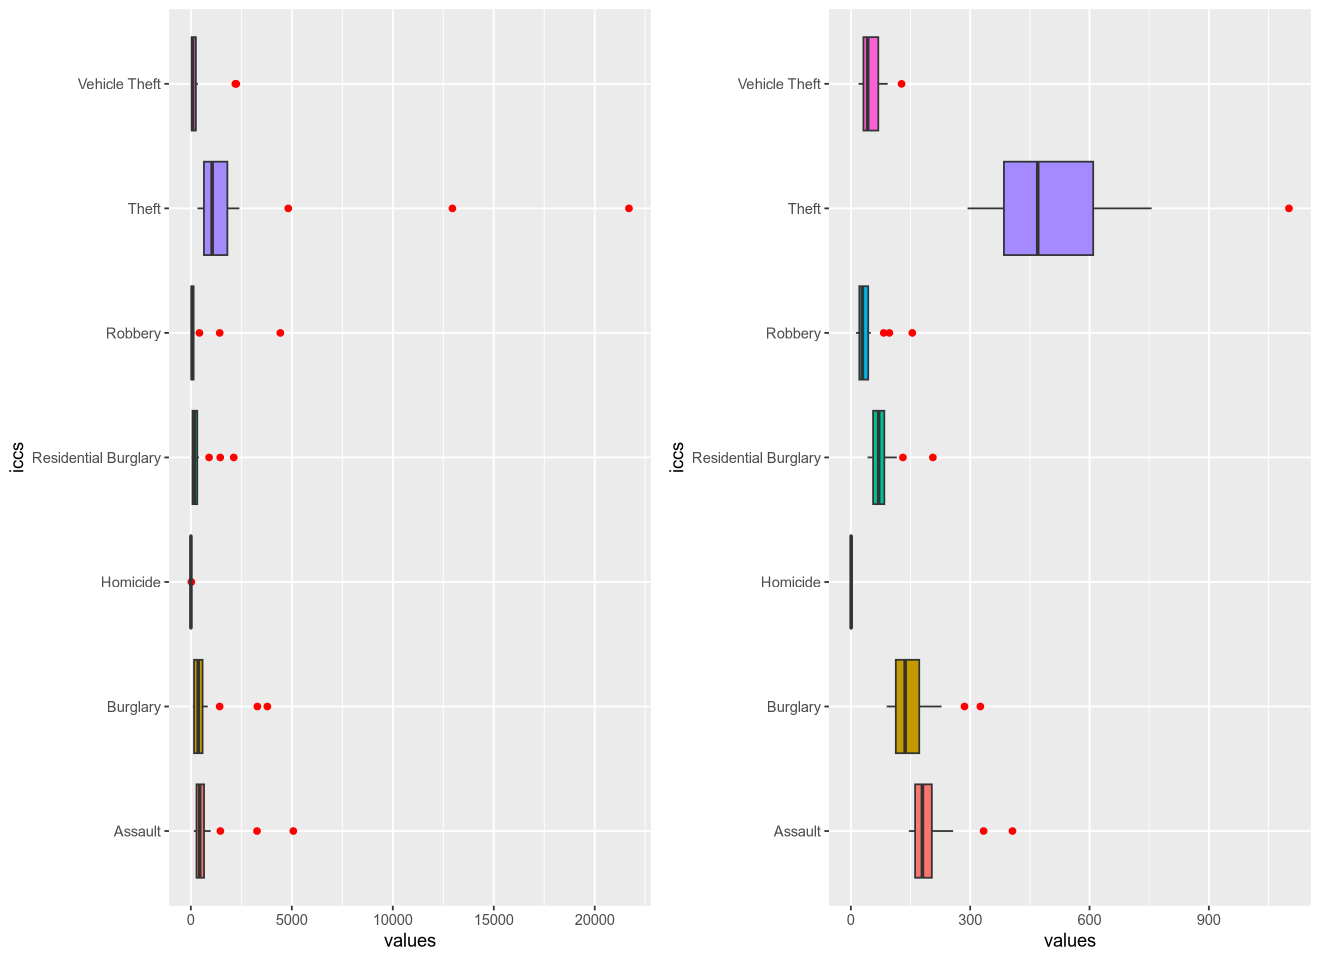

In [17]:
p1 <- ggplot(data_2021_NR, aes(x=values, y=iccs, fill=iccs)) +
        geom_boxplot(outlier.color="red", show.legend=F)
p2 <- ggplot(data_2021_P_HTHAB, aes(x=values, y=iccs, fill=iccs)) +
        geom_boxplot(outlier.color="red", show.legend=F)
plot_grid(p1,p2, nrow=1)

We can see that in each category, there are some outliers. In Theft NR, we can see the already mentioned PT170, PT11A, PT150, and when we switch to P_HTHAB, only PT250 remains.

## Task 02 

In [18]:
crime_table <- xtabs(values ~ iccs + geo, data = data_2021_NR)
addmargins(crime_table)

geo
iccs                   PT111 PT112 PT119 PT11A PT11B PT11C PT11D PT11E PT150 PT16B PT16D PT16E PT16F PT16G PT16H PT16I PT16J PT170 PT181 PT184 PT185 PT186
  Assault               395   598   671   3277 166    667   355  215   1462   562   631   647   418   392  144    377   457   5076  215   280   437  210  
  Burglary              382   580   560   3294 147    390   171  128   1426   526   837   823   579   313  111    308   193   3787   97   106   364  140  
  Homicide                0     1     2     10   1      3     2    0      3     3     4     4     3     4    0      4     0     25    0     0     2    0  
  Residential Burglary  208   296   275   1454  68    196    89   64    903   303   366   404   331   168   56    152    89   2125   45    51   165   82  
  Robbery                31   176   111   1429  18     75    37   24    424   138   132   152    96    33   23     52    29   4432   27    26   119   22  
  Theft                1055  2103  1408  12952 329   1352   660  392   4824  1745  2403  2160  1347  1042  405    951   760  21695  612   577  1443  428  
  Vehicle Theft          79   300   256   2203  43    175    60   30    352   150   340   248   192    74   26    161    65   2249   44    42   172   20  
  Sum                  2150  4054  3283  24619 772   2858  1374  853   9394  3427  4713  4438  2966  2026  765   2005  1593  39389 1040  1082  2702  902  
                      geo
iccs                   PT187 PT200 PT300 Sum   
  Assault               258   984   653   19547
  Burglary              158   692   287   16399
  Homicide                3     3     4      81
  Residential Burglary   70   317   142    8419
  Robbery                50   107   125    7888
  Theft                 648  1808   745   63844
  Vehicle Theft          41    87    69    7478
  Sum                  1228  3998  2025  123656

We can see that international homicides rarely happen, mainly in major cities like Lisbon (PT170) and Porto (PT11A). Theft is by far the most common (ICCS0502) crime, with 63,844 occurrences, and it happens again in Lisbon as the third most common crime. We can see that the region type affects the types and numbers of crimes. PT150 (Algarve) has a population of 451,006 and a total crime number of 9,394, while PT112 (Cávado) has a population of 410,169 but less than half the amount of crime, with 4,054 cases.

In [19]:
addmargins(prop.table(crime_table))

geo
iccs                   PT111        PT112        PT119        PT11A        PT11B        PT11C        PT11D        PT11E        PT150        PT16B       
  Assault              0.0031943456 4.835997e-03 0.0054263441 2.650094e-02 1.342434e-03 5.393996e-03 0.0028708676 0.0017386944 1.182312e-02 4.544866e-03
  Burglary             0.0030892152 4.690432e-03 0.0045286925 2.663842e-02 1.188782e-03 3.153911e-03 0.0013828686 0.0010351297 1.153199e-02 4.253736e-03
  Homicide             0.0000000000 8.086951e-06 0.0000161739 8.086951e-05 8.086951e-06 2.426085e-05 0.0000161739 0.0000000000 2.426085e-05 2.426085e-05
  Residential Burglary 0.0016820858 2.393737e-03 0.0022239115 1.175843e-02 5.499127e-04 1.585042e-03 0.0007197386 0.0005175649 7.302517e-03 2.450346e-03
  Robbery              0.0002506955 1.423303e-03 0.0008976515 1.155625e-02 1.455651e-04 6.065213e-04 0.0002992172 0.0001940868 3.428867e-03 1.115999e-03
  Theft                0.0085317332 1.700686e-02 0.0113864269 1.047422e-01 2.660607e-03 1.093356e-02 0.0053373876 0.0031700848 3.901145e-02 1.411173e-02
  Vehicle Theft        0.0006388691 2.426085e-03 0.0020702594 1.781555e-02 3.477389e-04 1.415216e-03 0.0004852171 0.0002426085 2.846607e-03 1.213043e-03
  Sum                  0.0173869444 3.278450e-02 0.0265494598 1.990926e-01 6.243126e-03 2.311251e-02 0.0111114705 0.0068981691 7.596882e-02 2.771398e-02
                      geo
iccs                   PT16D        PT16E        PT16F        PT16G        PT16H        PT16I        PT16J        PT170        PT181        PT184       
  Assault              0.0051028660 0.0052322572 3.380345e-03 0.0031700848 0.0011645209 0.0030487805 0.0036957366 0.0410493627 0.0017386944 0.0022643463
  Burglary             0.0067687779 0.0066555606 4.682345e-03 0.0025312156 0.0008976515 0.0024907809 0.0015607815 0.0306252830 0.0007844342 0.0008572168
  Homicide             0.0000323478 0.0000323478 2.426085e-05 0.0000323478 0.0000000000 0.0000323478 0.0000000000 0.0002021738 0.0000000000 0.0000000000
  Residential Burglary 0.0029598240 0.0032671282 2.676781e-03 0.0013586078 0.0004528693 0.0012292165 0.0007197386 0.0171847707 0.0003639128 0.0004124345
  Robbery              0.0010674775 0.0012292165 7.763473e-04 0.0002668694 0.0001859999 0.0004205214 0.0002345216 0.0358413664 0.0002183477 0.0002102607
  Theft                0.0194329430 0.0174678139 1.089312e-02 0.0084266028 0.0032752151 0.0076906903 0.0061460827 0.1754463997 0.0049492139 0.0046661707
  Vehicle Theft        0.0027495633 0.0020055638 1.552695e-03 0.0005984344 0.0002102607 0.0013019991 0.0005256518 0.0181875526 0.0003558258 0.0003396519
  Sum                  0.0381137996 0.0358898881 2.398590e-02 0.0163841625 0.0061865174 0.0162143365 0.0128825128 0.3185369088 0.0084104289 0.0087500809
                      geo
iccs                   PT185        PT186        PT187        PT200        PT300        Sum        
  Assault              0.0035339975 0.0016982597 2.086433e-03 7.957560e-03 0.0052807789 0.158075629
  Burglary             0.0029436501 0.0011321731 1.277738e-03 5.596170e-03 0.0023209549 0.132617908
  Homicide             0.0000161739 0.0000000000 2.426085e-05 2.426085e-05 0.0000323478 0.000655043
  Residential Burglary 0.0013343469 0.0006631300 5.660866e-04 2.563563e-03 0.0011483470 0.068084040
  Robbery              0.0009623472 0.0001779129 4.043475e-04 8.653037e-04 0.0010108689 0.063789869
  Theft                0.0116694701 0.0034612150 5.240344e-03 1.462121e-02 0.0060247784 0.516303293
  Vehicle Theft        0.0013909556 0.0001617390 3.315650e-04 7.035647e-04 0.0005579996 0.060474219
  Sum                  0.0218509413 0.0072944297 9.930776e-03 3.233163e-02 0.0163760756 1.000000000

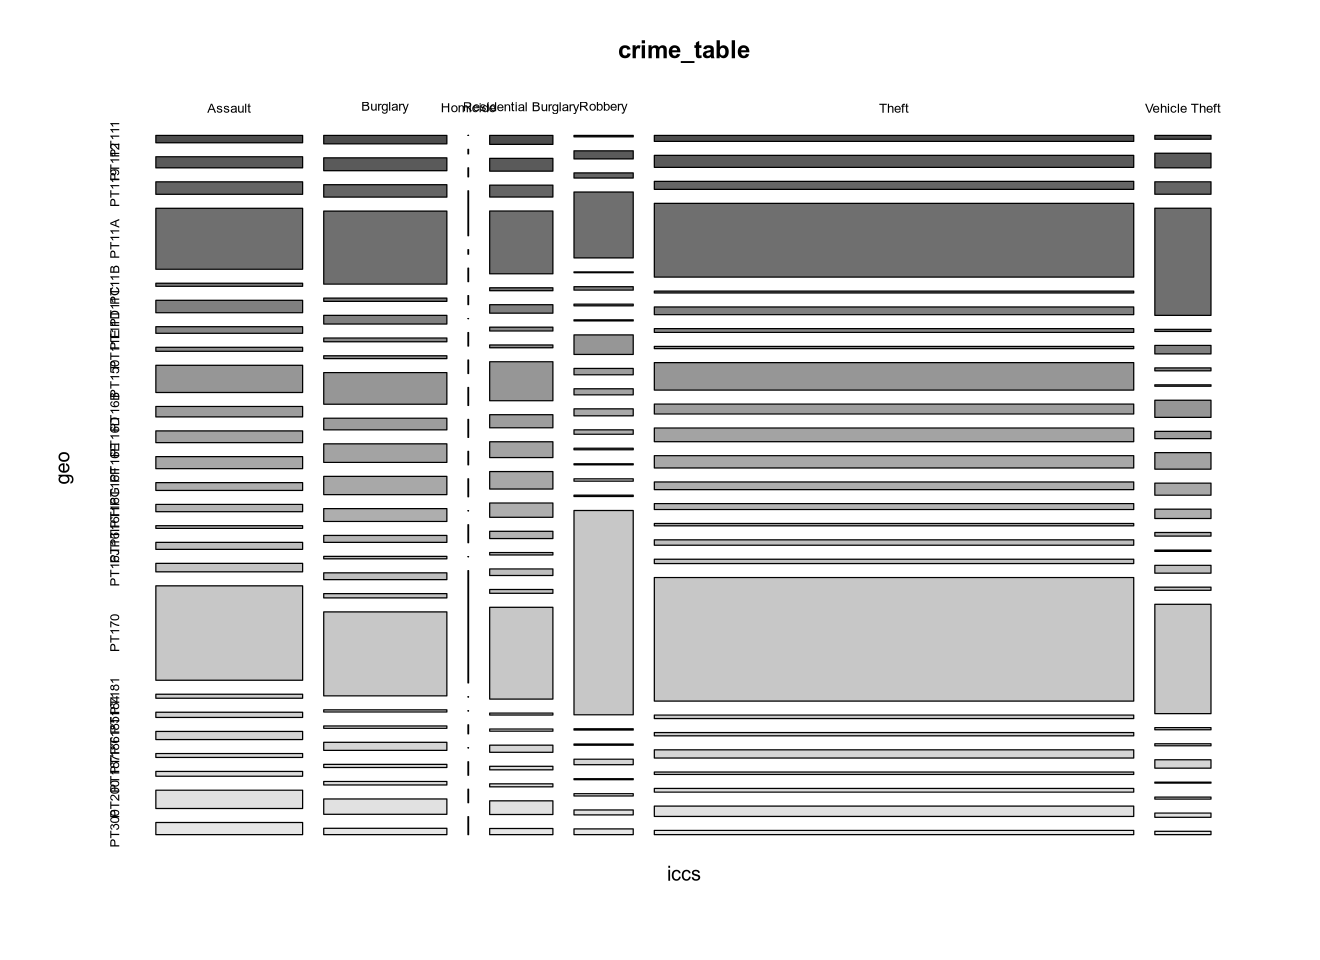

In [20]:
mosaicplot(crime_table, color=T)

Crime rate in diffrent regoins

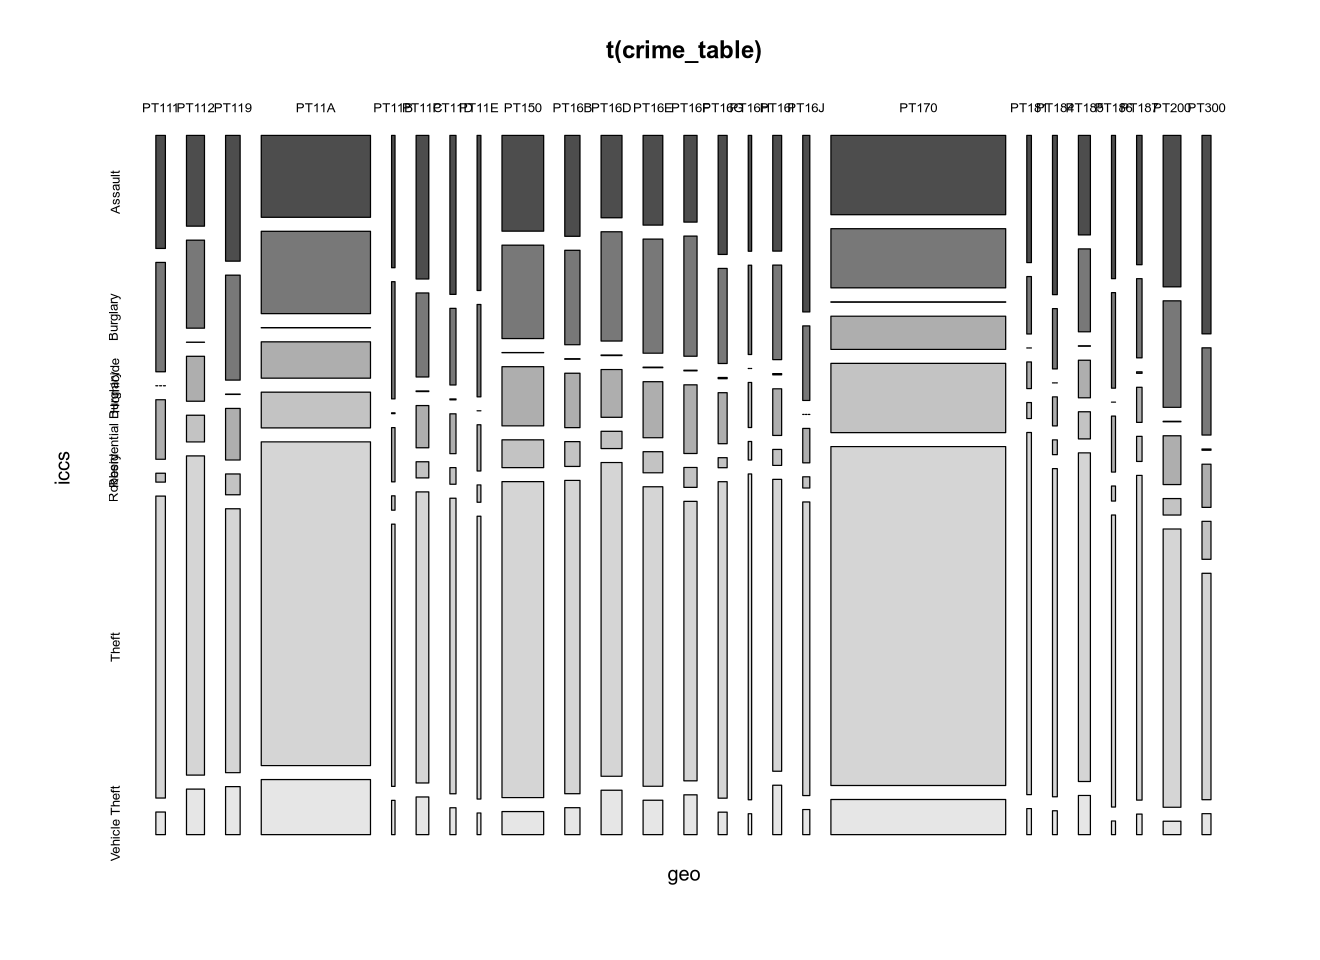

In [22]:
mosaicplot(t(crime_table), color=T)

In [23]:
data_no_homicide_NR <- subset(data_2021_NR, iccs != "Homicide")
crime_table_no_homocide <- xtabs(values ~ iccs + geo, data = data_no_homicide_NR)
# addmargins(crime_table_no_homocide)

out <- chisq.test(crime_table_no_homocide)
out


	Pearson's Chi-squared test

data:  crime_table_no_homocide
X-squared = 6407.4, df = 120, p-value < 2.2e-16


Crimes `Homicide` have too low a frequency, so Pearson's Chi-squared test could not be used, but without it, it is valid. The p-value is < 0.05; therefore, I reject the null hypothesis of independence and conclude that there is a significant association between the type of crime and the district. This corresponds with my expectations; in rural areas, I would expect different crimes than in major cities.

In [24]:
addmargins(out$expected)

geo
iccs                   PT111     PT112     PT119     PT11A     PT11B     PT11C     PT11D      PT11E     PT150     PT16B     PT16D     PT16E     PT16F    
  Assault               340.0854  641.1005  518.9861  3892.633 121.95620  451.6017  217.02192 134.92689 1485.4613  541.6057  744.8661  701.3668  468.6851
  Burglary              285.3154  537.8527  435.4046  3265.733 102.31543  378.8723  182.07103 113.19722 1246.2311  454.3814  624.9071  588.4132  393.2044
  Residential Burglary  146.4766  276.1255  223.5302  1676.578  52.52720  194.5073   93.47253  58.11375  639.7963  233.2726  320.8179  302.0825  201.8652
  Robbery               137.2381  258.7098  209.4317  1570.834  49.21423  182.2394   87.57707  54.44842  599.4433  218.5597  300.5834  283.0297  189.1333
  Theft                1110.7797 2093.9489 1695.1015 12714.036 398.33076 1475.0121  708.83243 440.69538 4851.7824 1768.9812 2432.8658 2290.7894 1530.8094
  Vehicle Theft         130.1048  245.2627  198.5460  1489.186  46.65618  172.7671   83.02501  51.61832  568.2856  207.1994  284.9598  268.3184  179.3026
  Sum                  2150.0000 4053.0000 3281.0000 24609.000 771.00000 2855.0000 1372.00000 853.00000 9391.0000 3424.0000 4709.0000 4434.0000 2963.0000
                      geo
iccs                   PT16G     PT16H     PT16I     PT16J      PT170     PT181      PT184      PT185     PT186     PT187      PT200     PT300     Sum   
  Assault               319.8384 121.00712  316.5167  251.97953  6226.568  164.50641  171.14994  427.0840 142.67768  193.76957  631.9261  319.6803  19547
  Burglary              268.3292 101.51920  265.5424  211.39880  5223.793  138.01303  143.58663  358.3031 119.69976  162.56342  530.1558  268.1965  16399
  Residential Burglary  137.7562  52.11843  136.3255  108.52897  2681.817   70.85381   73.71522  183.9474  61.45206   83.45762  272.1740  137.6880   8419
  Robbery               129.0677  48.83124  127.7272  101.68387  2512.670   66.38495   69.06588  172.3455  57.57618   78.19381  255.0076  129.0038   7888
  Theft                1044.6495 395.23091 1033.8001  823.01025 20337.084  537.30738  559.00634 1394.9326 466.01083  632.88610 2063.9837 1044.1329  63844
  Vehicle Theft         122.3590  46.29310  121.0882   96.39858  2382.068   62.93441   65.47599  163.3874  54.58350   74.12948  241.7529  122.2985   7478
  Sum                  2022.0000 765.00000 2001.0000 1593.00000 39364.000 1040.00000 1082.00000 2700.0000 902.00000 1225.00000 3995.0000 2021.0000 123575

In [25]:
fisher.test(crime_table, simulate.p.value=T)


	Fisher's Exact Test for Count Data with simulated p-value (based on 2000 replicates)

data:  crime_table
p-value = 0.0004998
alternative hypothesis: two.sided


Because of `Homicide`, I also performed Fisher's Exact Test. Its p-value is also below 0.05; therefore, once again, I reject the null hypothesis of independence and conclude that there is a significant association between the type of crime and the NUTS3 district.

## Task 03

### Test 1

Police-recorded burglaries amounted to around 1,200,300 in 2021. The number of burglaries decreased by 7% compared to 2020 in the EU. We want to test if the mean value in Portugal for all districts corresponds with these numbers and that it is not greater than the EU's 7%.

??
we are examining the mean value of the year-on-year decline.


* H0: mean burglary values are 7%
* Ha: mean is greater than 7%"

In [26]:
data_burglaries <- subset(data, iccs == "ICCS0501")
data_burglaries <- subset(data_burglaries, format(TIME_PERIOD, "%Y") %in% c("2020", "2021"))
data_burglaries_NR <- subset(data_burglaries, unit == "NR")
data_burglaries_P_HTHAB <- subset(data_burglaries, unit == "P_HTHAB")
data_burglaries_NR$freq <- NULL
data_burglaries_NR$unit <- NULL
data_burglaries_NR$iccs <- NULL
data_burglaries_P_HTHAB$freq <- NULL
data_burglaries_P_HTHAB$unit <- NULL
data_burglaries_P_HTHAB$iccs <- NULL

head(data_burglaries_NR)

geo   TIME_PERIOD values
1 PT111 2020-01-01  426   
2 PT111 2021-01-01  382   
3 PT112 2020-01-01  717   
4 PT112 2021-01-01  580   
5 PT119 2020-01-01  812   
6 PT119 2021-01-01  560

In [27]:
data_burglaries_decrese <- data_burglaries %>%
  group_by(geo) %>%
  summarise(total_2020 = sum(values[format(TIME_PERIOD, "%Y") == "2020"]),
            total_2021 = sum(values[format(TIME_PERIOD, "%Y") == "2021"]))

data_burglaries_decrese <- data_burglaries_decrese %>%
  mutate(percentage_change = ((total_2021 - total_2020) / total_2020) * 100)

head(data_burglaries_decrese)

geo   total_2020 total_2021 percentage_change
1 PT111  610.89     548.76    -10.17041        
2 PT112  894.28     723.61    -19.08463        
3 PT119 1009.16     696.51    -30.98121        
4 PT11A 4096.04    3484.65    -14.92637        
5 PT11B  434.36     318.93    -26.57473        
6 PT11C  694.62     484.29    -30.27987

In [43]:
# ?? SMAZAT?

t.test(data_burglaries_decrese$percentage_change, mu=-7, alternative="greater")


	One Sample t-test

data:  data_burglaries_decrese$percentage_change
t = -4.0686, df = 24, p-value = 0.9998
alternative hypothesis: true mean is greater than -7
95 percent confidence interval:
 -22.78477       Inf
sample estimates:
mean of x 
-18.11208 


The p-value is 0.9998, which is > than 0.05. Therefore, we cannot reject H0, which states that the mean is 7%.

In [28]:
t.test(data_burglaries_decrese$percentage_change, mu=-7, alternative="less")


	One Sample t-test

data:  data_burglaries_decrese$percentage_change
t = -4.0686, df = 24, p-value = 0.0002215
alternative hypothesis: true mean is less than -7
95 percent confidence interval:
      -Inf -13.43938
sample estimates:
mean of x 
-18.11208 


If we change the test to:
H0: x = 7%
Ha: x < 7%

Then the p-value is 0.002215, which is < 0.05. Therefore, we can reject H0 in favor of Ha.

These tests indicate that there is sufficient evidence to conclude that the true mean percentage change in burglaries from 2020 to 2021 is less than 7%, and therefore better than the EU average.  (? worse)

### Test 2

Based on the article 'https://euroweeklynews.com/2022/08/27/recent-study-data-reveal-the-european-countries-ranked-the-worst-for-car-theft/', where the figures produced represent annual averages from 2011 to 2019, using data from Eurostat, the average car theft per 100,000 in Portugal was 125. I will test if the current data correspond with that or are better for the median district.

In [37]:
data_car_theft <- subset(data, iccs == "ICCS050211")
data_car_theft <- subset(data_car_theft, format(TIME_PERIOD, "%Y") == "2021")
data_car_theft_P_HTHAB <- subset(data_car_theft, unit == "P_HTHAB")
data_car_theft_P_HTHAB$freq <- NULL
data_car_theft_P_HTHAB$unit <- NULL
data_car_theft_P_HTHAB$iccs <- NULL

head(data_burglaries_P_HTHAB)

geo   TIME_PERIOD values
1 PT111 2021-01-01   34.49
2 PT112 2021-01-01   74.28
3 PT119 2021-01-01   62.40
4 PT11A 2021-01-01  127.51
5 PT11B 2021-01-01   50.29
6 PT11C 2021-01-01   42.31

Given the data may not be normally distributed we chose to use the Wilcoxon's test for being a non-parametric test, that is used to compare the median

In [39]:
wilcox.test(data_car_theft_P_HTHAB$values, mu=125, alternative="less")


	Wilcoxon signed rank exact test

data:  data_car_theft_P_HTHAB$values
V = 1, p-value = 5.96e-08
alternative hypothesis: true location is less than 125


The p-value is 5.96e-8, which is < 0.05. Therefore, I reject H0 that the median is 125 in favor of Ha that it is lower.

This test tells us that in 2021, vehicle thefts improved compared to the years 2011-2019.

The best performing country was Denmark, with just 5 car thefts per 100,000 citizens.

In [40]:
wilcox.test(data_burglaries_P_HTHAB$values, mu=5, alternative="greater")


	Wilcoxon signed rank exact test

data:  data_burglaries_P_HTHAB$values
V = 325, p-value = 2.98e-08
alternative hypothesis: true location is greater than 5


<!-- The p-value is 1, which is not < 0.05, so we cannot reject H0.

These tests show us that Portugal improved but is not better than Denmark was in 2011-2019.

It's important to note that the article was looking at just cars, but our numbers are for all land vehicles. -->
The p-value is 2.98e-08, which is < 0.05. Therefore, I can reject H0 that the median is 5 in favor of Ha, that is higher. This tells us that Portugal is worse and has higher car theft than Denmark was in 2011-2019

It's important to note that the article was looking at just cars, but our numbers are for all land vehicles.

### Test 3
The last test that I want to perform is to test the correlation between thefts and burglaries in Lisbon.

In [34]:
data_Lisabon <- subset(data, geo == "PT170")
data_Lisabon_theft <- subset(data_Lisabon, iccs == "ICCS0502")

data_Lisabon_burglari <- subset(data_Lisabon, iccs == "ICCS0501")
data_Lisabon_burglari <- subset(data_Lisabon_burglari, format(TIME_PERIOD, "%Y") != "2021")

data_Lisabon_theft <- subset(data_Lisabon_theft, unit == "P_HTHAB")
data_Lisabon_burglari <- subset(data_Lisabon_burglari, unit == "P_HTHAB")

head(data_Lisabon_theft,100)
head(data_Lisabon_burglari,100)

freq unit    iccs     geo   TIME_PERIOD values 
1  A    P_HTHAB ICCS0502 PT170 2008-01-01  2020.88
2  A    P_HTHAB ICCS0502 PT170 2009-01-01  1769.42
3  A    P_HTHAB ICCS0502 PT170 2011-01-01  1574.03
4  A    P_HTHAB ICCS0502 PT170 2012-01-01  1500.72
5  A    P_HTHAB ICCS0502 PT170 2013-01-01  1387.28
6  A    P_HTHAB ICCS0502 PT170 2014-01-01  1430.90
7  A    P_HTHAB ICCS0502 PT170 2015-01-01  1316.08
8  A    P_HTHAB ICCS0502 PT170 2016-01-01  1218.23
9  A    P_HTHAB ICCS0502 PT170 2017-01-01  1223.32
10 A    P_HTHAB ICCS0502 PT170 2018-01-01  1182.74
11 A    P_HTHAB ICCS0502 PT170 2019-01-01  1056.03
12 A    P_HTHAB ICCS0502 PT170 2020-01-01   718.93
13 A    P_HTHAB ICCS0502 PT170 2021-01-01   756.18

freq unit    iccs     geo   TIME_PERIOD values
1  A    P_HTHAB ICCS0501 PT170 2008-01-01  565.09
2  A    P_HTHAB ICCS0501 PT170 2009-01-01  407.15
3  A    P_HTHAB ICCS0501 PT170 2010-01-01  401.75
4  A    P_HTHAB ICCS0501 PT170 2011-01-01  442.86
5  A    P_HTHAB ICCS0501 PT170 2012-01-01  403.11
6  A    P_HTHAB ICCS0501 PT170 2013-01-01  326.96
7  A    P_HTHAB ICCS0501 PT170 2014-01-01  299.55
8  A    P_HTHAB ICCS0501 PT170 2015-01-01  243.49
9  A    P_HTHAB ICCS0501 PT170 2016-01-01  214.99
10 A    P_HTHAB ICCS0501 PT170 2017-01-01  185.76
11 A    P_HTHAB ICCS0501 PT170 2018-01-01  192.93
12 A    P_HTHAB ICCS0501 PT170 2019-01-01  181.67
13 A    P_HTHAB ICCS0501 PT170 2020-01-01  149.34

We chose to use the Spearman correlation test because it does not assume that the data are from a normal distribution

In [36]:
cor.test(data_Lisabon_theft$values, data_Lisabon_burglari$values, method = "spearman")


	Spearman's rank correlation rho

data:  data_Lisabon_theft$values and data_Lisabon_burglari$values
S = 20, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9450549 


The p-value is 2.2e-16, which is < 0.05. Therefore, I can reject H0 that there is no correlation in favor of Ha, where rho is 0.945. This tells us that there is a strong correlation between thefts and burglaries in Lisbon, and that if one grows, the other does so too, and vice versa.